In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transaction_data = pd.read_csv("C:/Users/agast/OneDrive/Documents/Power BI Project/QVI_transaction_data.csv")

In [3]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
try:

    # Convert the 'DATE' column to datetime objects
    transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], unit='d', origin='1899-12-30')  

    # Print the DataFrame with the converted dates
    transaction_data.head()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [5]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
# Basic exploration
print(transaction_data.head())
print(transaction_data.info())
print(transaction_data.describe())
print(transaction_data.isnull().sum())  # Check for missing values

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE      

In [7]:
transaction_data['PROD_QTY'].unique() # Checking for all unique values of categorical variables

array([  2,   3,   5,   1,   4, 200], dtype=int64)

In [8]:
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.lower().str.strip() # Standardizing textual categorical variables

In [9]:
transaction_data.duplicated().sum() # Checking for duplicated

1

In [10]:
transaction_data = transaction_data.drop_duplicates() # Removing duplicated

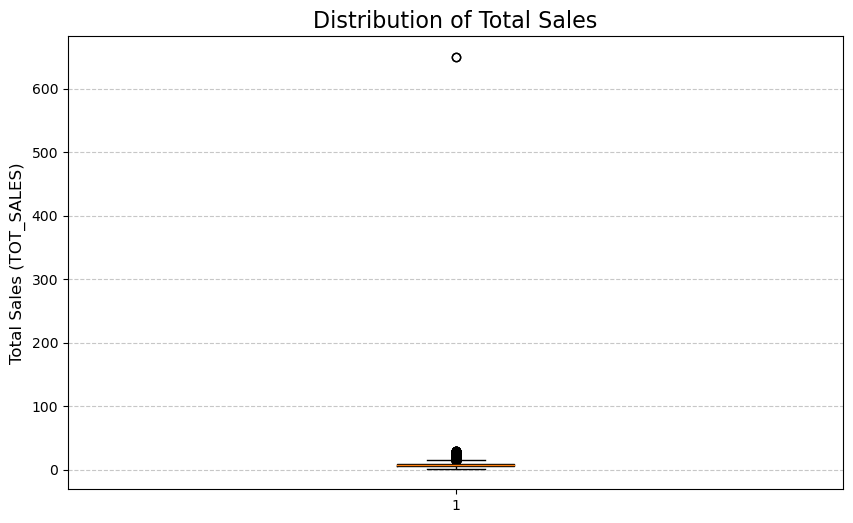

In [11]:
plt.figure(figsize=(10, 6), dpi=100)

plt.boxplot(transaction_data['TOT_SALES'])

plt.title('Distribution of Total Sales', fontsize=16)
plt.ylabel('Total Sales (TOT_SALES)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Checking for outliers

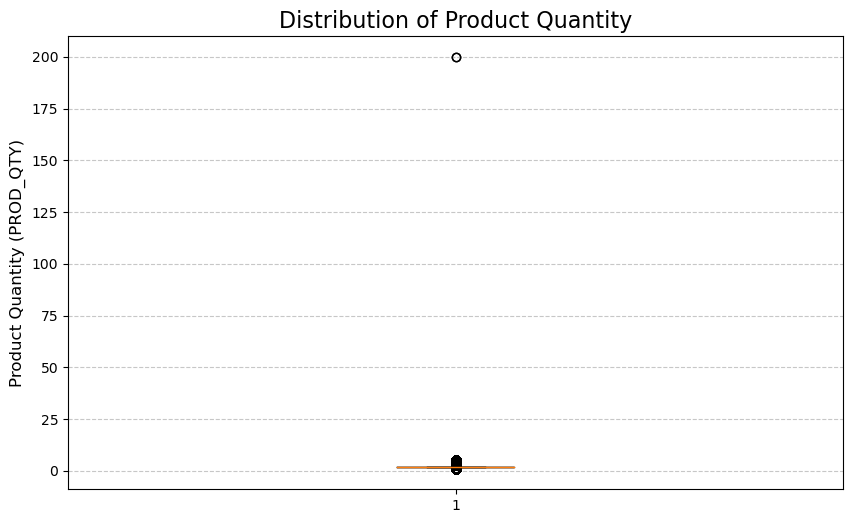

In [38]:
plt.figure(figsize=(10, 6), dpi=100)

plt.boxplot(transaction_data['PROD_QTY'])

plt.title('Distribution of Product Quantity', fontsize=16)
plt.ylabel('Product Quantity (PROD_QTY)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [39]:
unique_quantities = transaction_data['PROD_QTY'].unique()

print(unique_quantities)

[  2   3   5   1   4 200]


#### Checking for outliers

In [12]:
max_sales_row = transaction_data[transaction_data['TOT_SALES'] == transaction_data['TOT_SALES'].max()]
print(max_sales_row)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  dorito corn chp     supreme 380g       200      650.0  
69763  dorito corn chp     supreme 380g       200      650.0  


#### These purchases are very odd compared to the rest of the purchases. Maximum number of chips packets bought at a time were 5, but here there are 200. These clearly are outliers so we will be dropping these rows for better analysis.

In [13]:
loyalty_card_number_to_drop = 226000

# Find the rows to drop
rows_to_drop = transaction_data[transaction_data['LYLTY_CARD_NBR'] == loyalty_card_number_to_drop]

# Get the index of those rows
index_to_drop = rows_to_drop.index

# Drop the rows
transaction_data.drop(index_to_drop, inplace=True)

# Reset the index (optional)
transaction_data.reset_index(drop=True, inplace=True)

# Verify the deletion
if loyalty_card_number_to_drop in transaction_data['LYLTY_CARD_NBR'].values:
    print(f"Rows with loyalty card number {loyalty_card_number_to_drop} were not dropped.")
else:
    print(f"Rows with loyalty card number {loyalty_card_number_to_drop} have been successfully dropped.")
    

transaction_data.head(69675) #Checking if the rows have been dropped or not

Rows with loyalty card number 226000 have been successfully dropped.


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
69670,2018-08-17,160,160091,160701,111,smiths chip thinly cut original 175g,1,3.0
69671,2019-05-17,160,160151,161078,73,smiths crinkle cut salt & vinegar 170g,2,5.8
69672,2019-05-19,160,160193,161346,58,red rock deli chikn&garlic aioli 150g,1,2.7
69673,2018-08-16,164,164020,163910,104,infuzions thai sweetchili potatomix 110g,1,3.8


In [3]:
customer_data = pd.read_csv("C:/Users/agast/OneDrive/Documents/Power BI Project/QVI_purchase_behaviour.csv")

In [4]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [15]:
# Basic exploration
print(customer_data.head())
print(customer_data.info())
print(customer_data.describe())
print(customer_data.isnull().sum())  # Check for missing values

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUS

In [16]:
customer_data.duplicated().sum() # Checking for duplicates

0

In [17]:
#Checking for unique values in the 2 categorical variables

# Unique values in LIFESTAGE
unique_lifestages = customer_data['LIFESTAGE'].unique()
print("Unique LIFESTAGE values:", unique_lifestages)

# Unique values in PREMIUM_CUSTOMER
unique_premium_customers = customer_data['PREMIUM_CUSTOMER'].unique()
print("\nUnique PREMIUM_CUSTOMER values:", unique_premium_customers)

Unique LIFESTAGE values: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']

Unique PREMIUM_CUSTOMER values: ['Premium' 'Mainstream' 'Budget']


In [18]:
#Deleting the rows where loyalty number was 226000 as it was an outlier in the transactions dataset

loyalty_card_number_to_drop = 226000

# Check if the loyalty card number exists in customer_data
if loyalty_card_number_to_drop in customer_data['LYLTY_CARD_NBR'].values:
    # Find the rows to drop in customer_data
    rows_to_drop = customer_data[customer_data['LYLTY_CARD_NBR'] == loyalty_card_number_to_drop]

    # Get the index of those rows
    index_to_drop = rows_to_drop.index

    # Drop the rows from customer_data
    customer_data.drop(index_to_drop, inplace=True)

    # Reset the index (optional)
    customer_data.reset_index(drop=True, inplace=True)

    print(f"Rows with loyalty card number {loyalty_card_number_to_drop} have been successfully dropped from customer_data.")
else:
    print(f"Loyalty card number {loyalty_card_number_to_drop} not found in customer_data.")

# Verify the deletion
print(customer_data[customer_data['LYLTY_CARD_NBR'] == loyalty_card_number_to_drop]) # Should return an empty dataframe.

Rows with loyalty card number 226000 have been successfully dropped from customer_data.
Empty DataFrame
Columns: [LYLTY_CARD_NBR, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


In [19]:
# Standardize LIFESTAGE
customer_data['LIFESTAGE'] = customer_data['LIFESTAGE'].str.strip().str.lower()

# Standardize PREMIUM_CUSTOMER
customer_data['PREMIUM_CUSTOMER'] = customer_data['PREMIUM_CUSTOMER'].str.strip().str.lower()

In [20]:
#Merging the 2 datasets

# Merge the DataFrames using 'LYLTY_CARD_NBR' as the key
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

merged_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0,young singles/couples,premium
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3,midage singles/couples,budget
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.0,midage singles/couples,budget
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8,midage singles/couples,budget
5,2019-05-19,4,4074,2982,57,old el paso salsa dip tomato mild 300g,1,5.1,midage singles/couples,budget
6,2019-05-16,4,4149,3333,16,smiths crinkle chips salt & vinegar 330g,1,5.7,midage singles/couples,budget
7,2019-05-16,4,4196,3539,24,grain waves sweet chilli 210g,1,3.6,midage singles/couples,budget
8,2018-08-20,5,5026,4525,42,doritos corn chip mexican jalapeno 150g,1,3.9,midage singles/couples,budget
9,2018-08-18,7,7150,6900,52,grain waves sour cream&chives 210g,2,7.2,midage singles/couples,budget


In [21]:
#Rearranging
numerical_cols = ['PROD_QTY', 'TOT_SALES']

# Identify categorical columns to move
cols_to_move = ['LIFESTAGE', 'PREMIUM_CUSTOMER']

# Identify remaining columns
remaining_cols = [col for col in merged_data.columns if col not in numerical_cols and col not in cols_to_move]

# Create new column order
new_cols = remaining_cols + cols_to_move + numerical_cols

# Rearrange the DataFrame
merged_data = merged_data[new_cols]

# Display the rearranged DataFrame
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,young singles/couples,premium,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,midage singles/couples,budget,3,6.3
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,midage singles/couples,budget,2,2.9
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,midage singles/couples,budget,5,15.0
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,midage singles/couples,budget,3,13.8


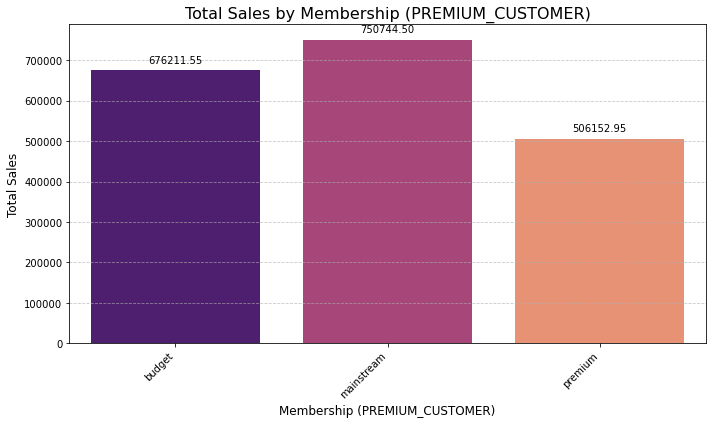

In [22]:
#Total sales by membership

# 1. Calculate Total Sales by PREMIUM_CUSTOMER
total_sales_by_membership = merged_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()


# 3. Create the Bar Chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=total_sales_by_membership, palette='magma')  # Change palette if desired

plt.title('Total Sales by Membership (PREMIUM_CUSTOMER)', fontsize=16)
plt.xlabel('Membership (PREMIUM_CUSTOMER)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# 5. Add Values on Top of Bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

#### Premium customers are surprisingly performing very bad as compared to other members. These members should be targeted to boost the sales

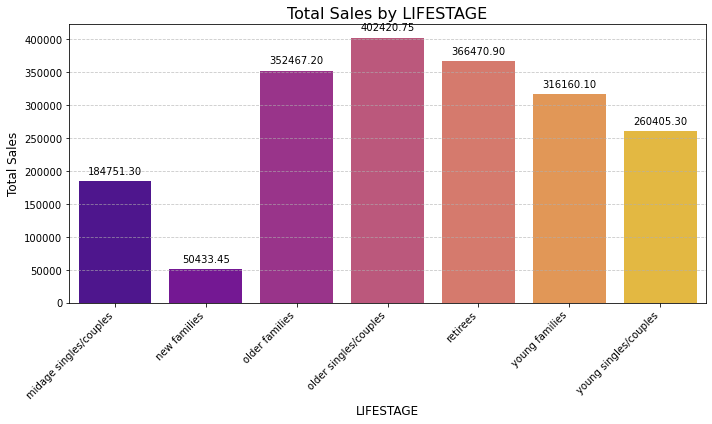

In [23]:
# 1. Calculate Total Sales by LIFESTAGE
total_sales_by_lifestage = merged_data.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# 3. Create the Bar Chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=total_sales_by_lifestage, palette='plasma')

plt.title('Total Sales by LIFESTAGE', fontsize=16)
plt.xlabel('LIFESTAGE', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Add Values on Top of Bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

#### Potato chips are performing extremely well among old peope as compared to younger people. Younger demograph should be targeted to increase the sales

In [24]:
# Converting 'DATE' to datetime objects (if it's not already)
customer_data['DATE'] = pd.to_datetime(transaction_data['DATE'])

# Group by 'DATE' and count the number of transactions
transactions_per_date = customer_data.groupby('DATE').size().reset_index(name='N')

# Print the result
print(transactions_per_date)

          DATE    N
0   2018-07-01  205
1   2018-07-02  207
2   2018-07-03  190
3   2018-07-04  197
4   2018-07-05  193
..         ...  ...
359 2019-06-26  186
360 2019-06-27  200
361 2019-06-28  210
362 2019-06-29  217
363 2019-06-30  215

[364 rows x 2 columns]


#### One date is missing let's take a look at a line chart to visualize transactions by individual dates

In [28]:
print(transactions_per_date.dtypes)

DATE    datetime64[ns]
N                int64
dtype: object


In [29]:
transactions_per_date.head()

,DATE,N
0,2018-07-01,205
1,2018-07-02,207
2,2018-07-03,190
3,2018-07-04,197
4,2018-07-05,193


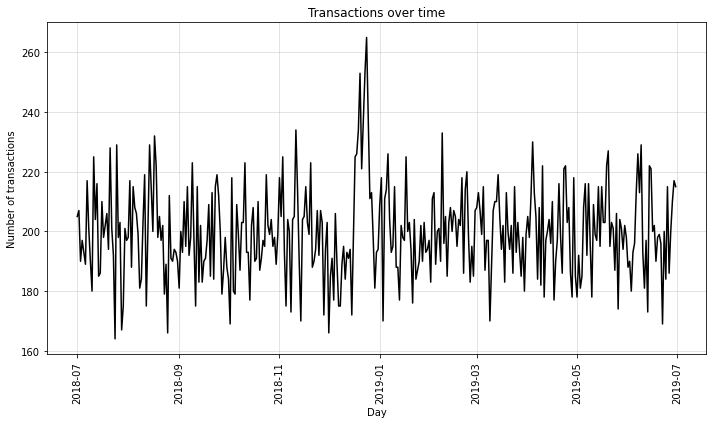

In [30]:
plt.figure(figsize=(10, 6))  
plt.plot(transactions_per_date['DATE'], transactions_per_date['N'], color='black')

plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')

plt.xticks(rotation=90)
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


#### We see the sales pick up drastically during the holiday season. Lets visualize it more closely.

In [31]:
december_data = transactions_per_date[transactions_per_date['DATE'].dt.month == 12]

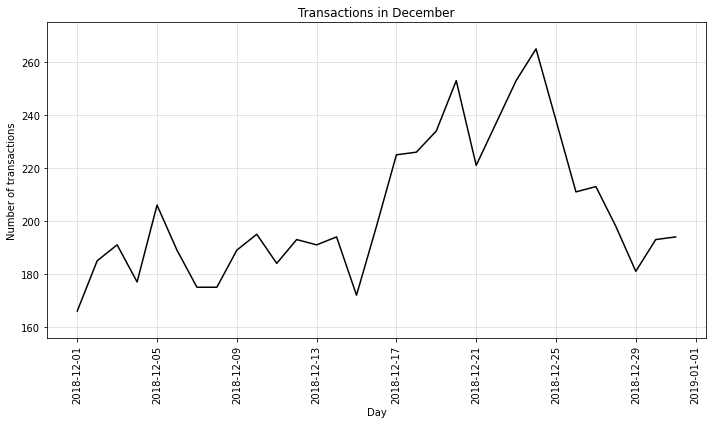

In [32]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(december_data['DATE'], december_data['N'], color='black')

# Labels and title
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions in December')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set y-axis limits based on data
plt.ylim(december_data['N'].min() - 10, december_data['N'].max() + 10)

# Add gridlines
plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### Sales picked up in mid of December and peaked on 24th December, certifying that people did their shopping for Christmas and NYE on that day

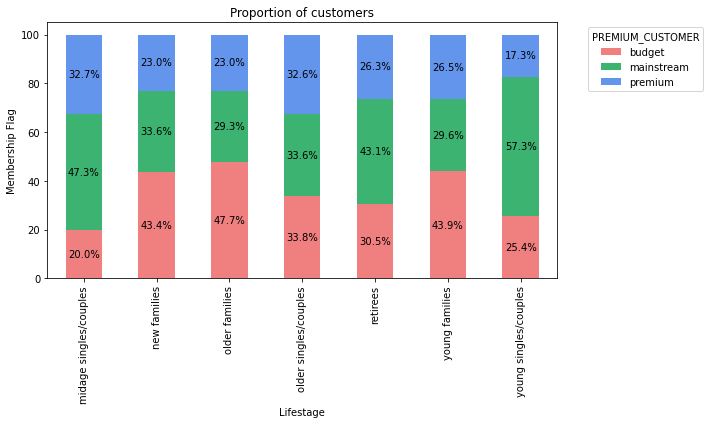

In [38]:
#Checking proportion of customers by Lifestage and Membership

# Create a crosstab (contingency table) to get the counts
cross_tab = pd.crosstab(merged_data['LIFESTAGE'], merged_data['PREMIUM_CUSTOMER'])

# Calculate percentages (proportions)
percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
percentages.plot(kind='bar', stacked=True, figsize=(10, 6), rot=0, color=['lightcoral', 'mediumseagreen', 'cornflowerblue'])

# Add labels and title
plt.xlabel('Lifestage')
plt.ylabel('Membership Flag')
plt.title('Proportion of customers')

# Adjust x-axis labels rotation
plt.xticks(rotation=90)

# Add percentages as text on the bars
for i in range(len(percentages)):
    bottom = 0
    for j, premium_customer in enumerate(percentages.columns):
        value = percentages.iloc[i, j]
        plt.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', color='black')
        bottom += value

# Add legend
plt.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#### There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget. Higher sales may also be driven by more units of chips being bought per customer. 

## Conclusion

#### From our analysis we can successfully infer that total sales from older people and younger families/singles was more than who were middle aged or new families. When we checked the proportion of customers by lifestages and their membership we witnessed that older, new and young families did most sales while having Budget membership. Young singles and couples, retirees, midage and older singles/couples did most sales while having Mainstream membership. Sales were very good during the holiday season with peak being on 24th December. I believe that potato chip sales should be targeted in those areas and cities where older population is significant as chip sales performed way better among older demographic than younger demographic.